# Symbolic Methods - Lab 1

In [1]:
from IPython.core.display import HTML
css_file = './ngcmstyle.css'
HTML(open(css_file, "r").read())

Aim: write a generator function to do central finite differencing at arbitrary order, using sympy. Test it on both scripted python and compiled C code.

## Mathematics

The central difference approximation to the first derivative uses Taylor series expansion to match to the first derivative term. That is, we approximate

$$
\begin{equation}
  \left. \frac{d \, f}{d \, x} \right|_{x = X} = c_0 f(X) + \sum_{i = 1}^{n} c_n \left( f(X + n h) - f(X - n h) \right) + {\cal O}(h^{2 n +1}).
\end{equation}
$$

The order of accuracy is $2 n$, which must be even.

This must be true for any function. For simplicity we can do the Taylor expansion to calculate the unknown coefficients $c_n$ by only considering $f(x) = \exp(x)$: as the coefficients are independent of the function, the resulting approximation holds for all (suitably differentiable) functions.

By subsituting in $f(x) = \exp(x)$ and performing the series expansion about $x = X$ with small parameter $h$, we can match the terms on both sides of the expression in orders of $h$. That is, terms with common factor $h^0$ must vanish, terms with common factor $h^1$ must give the derivative (which, when removing the common $\exp(x)$ term, means they must give $1$), and terms with common factor $h^j$ for $j > 1$ must vanish. This gives a system of $n$ linear equations that can be solved for the $c_n$.

Note that, by construction, all terms with even powers in $h$ (except $h^0$) vanish identically. So whilst the series is expanded to order $2n+1$, only the $n$ terms corresponding to the odd powers of $h$ are interesting.

## Useful functions

This list of functions, all from `sympy`, will be useful in forming your solution.

* `symbols`: create a symbol. Note that `c=symbols(c:3)` creates e.g. `c[0]=c0`, `c[1]=c1` and `c[2]=c2`.
* `exp`: the exponential in `sympy`
* `series`: Taylor series expansion about a point
* `removeO`: method that removes the ${\cal O}$ term from a series
* `expand`: expands out all terms - might be needed before some simplifications
* `collect`: collects terms with like powers of a given variable: returns a dictionary
* `coeff`: returns the coefficient corresponding to a given variable
* `zeros`: creates the zero matrix (or vector) of given size
* `solve`: method applied to a matrix to solve the linear problem $A {\bf x} = {\bf b}$ via `x=A.solve(b)`
* `sympy.utilities.lambdify`: as in lectures, constructs a python function that can be numerically evaluated.

### Sympy sandbox

In [10]:
help(sympy.series)

Help on function series in module sympy.series.series:

series(expr, x=None, x0=0, n=6, dir='+')
    Series expansion of expr around point `x = x0`.
    
    See the doctring of Expr.series() for complete details of this wrapper.



In [4]:
# Let order be 4
order = 4
c       = sympy.symbols('c:{}'.format(order))
x, n, h = sympy.symbols('x, n, h')
c, x, n, h

In [5]:
exp = sympy.exp(x)
exp

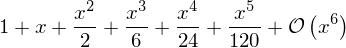

In [6]:
taylor = exp.series()
taylor

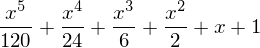

In [7]:
series = taylor.removeO()
series

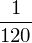

In [8]:
series.coeff(x**5)


In [13]:
f=sympy.Function('exp')
f

exp

In [14]:
rhs = c[0]*f(x) + sum([c[n]*(f(x+n*h) - f(x-n*h)) for n in range(1, order) ])
rhs

## Task - python

Write a function `central_differencing` that takes as input a positive, even integer `order`. The function should *derive*, from the Taylor series expansion, the coefficients $c_n$, and from those coefficients generate a function `df`. Only the function `df` should be returned. `df` should take as input an arbitrary function of one variable `f`, the point `X` at which the derivative is to be evaluated, and the step length `h`.

Test your function for orders $2, 4, 6, 8$. When applied to the exponential function (`numpy.exp`) at the origin you can compute the error as

$$
  \text{Error}_{h, \text{order}} = \big| {\tt df}({\tt numpy.exp}, 0.0, h) - 1 \big|.
$$

You should find your error scales as $h^{\text{order}}$. Test this by computing the error when $h = 2^{-i}$ for $i = 0, \dots, 5$ and fitting a straight line through the computed errors, using something like

`p = numpy.polyfit(log(H), log(Error), 1)`

where `p[0]` gives the convergence rate.

### Python working

In [3]:
import numpy
import sympy
sympy.init_printing()

In [ ]:
def central_differencing(order):
    """
    Arguments:
    order : integer
        positive, even integer
    
    Returns:
    df(f, x, h) : function
        derivative of function 'f' of one variable,
        the point 'x' at which the derivative is evaluated,
        with step size 'h'
    
    Derives from the Taylor series expansion the coefficients c_n,
    and from those coefficients generate a function 'df'.
    """
    c = sympy.symbols(c:order)
    

## Task - C

Modify your function to generate C code. Test it on a more complex function of your choice, evaluated at a specific point. You may wish to use `sympy` to evaluate the derivative in order to test your result.